# Challenge Set 4: Linear Regression and Learning Curve

In [1]:
# Python 2 & 3 Compatibility
from __future__ import division

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import matplotlib.dates as dte
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


%matplotlib inline

### Exercise 4.1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)



(0, 1.2)

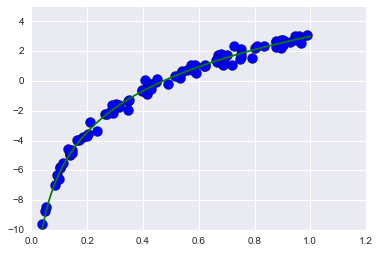

In [2]:
np.random.seed(1)

def func(x):
    return 3 + 4*np.log(x)

plot = np.linspace(0, 1, 100)

n = 100
X = np.random.uniform(0,1,size=n)
y = func(X) + np.random.normal(scale=0.3, size=n)

fig,ax = plt.subplots(1,1)
ax.plot(plot, func(plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((-10, 5))
ax.set_xlim((0, 1.2))

In [3]:
#Quadratic Model
model1 = sm.OLS(y, sm.add_constant(X**2))
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     73.36
Date:                Thu, 20 Oct 2016   Prob (F-statistic):           1.56e-13
Time:                        14:41:40   Log-Likelihood:                -278.43
No. Observations:                 100   AIC:                             560.9
Df Residuals:                      98   BIC:                             566.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -5.1369      0.584     -8.795      0.000        -6.296    -3.978
x1            11.4003      1.331      8.565      0.000         8.759    14.042
==============================================================================
Omnibus:                      128.870   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3247.487
Skew:                          -4.428   Prob(JB):                         0.00
Kurtosis:                      29.476   Cond. No.                         3.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
#Log Model
model2 = sm.OLS(y, sm.add_constant(np.log(X)))
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.665e+04
Date:                Thu, 20 Oct 2016   Prob (F-statistic):          6.03e-128
Time:                        14:41:40   Log-Likelihood:                -10.030
No. Observations:                 100   AIC:                             24.06
Df Residuals:                      98   BIC:                             29.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9954      0.036     84.013      0.000         2.925     3.066
x1             3.9734      0.021    191.439      0.000         3.932     4.015
==============================================================================
Omnibus:                        2.324   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.718
Skew:                          -0.232   Prob(JB):                        0.423
Kurtosis:                       3.444   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 4.2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)



(-5, 5)

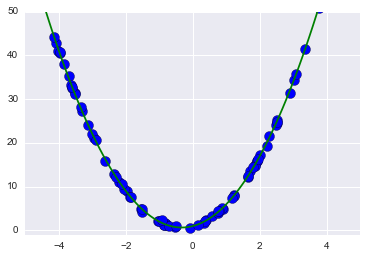

In [5]:
np.random.seed(1)

def func(x):
    return 1 + 2*x + 3*(x**2)

plot = np.linspace(-5, 5, 100)

n = 100
X = np.random.uniform(-5,5,size=n)
y = func(X) + np.random.normal(scale=0.3, size=n)

fig,ax = plt.subplots(1,1)
ax.plot(plot, func(plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((-1, 50))
ax.set_xlim((-5, 5))

In [6]:
X2 = pd.DataFrame(X, columns = ['X'])
X2['Xsq'] = X**2

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=1)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_train)
print "MSE for training:", metrics.mean_squared_error(y_train, predictions)

predictions2 = lr.predict(X_test)
print "MSE for test:", metrics.mean_squared_error(y_test, predictions2)

MSE for training: 0.074372220194
MSE for test: 0.0696282409581


### Exercise 4.3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared


In [9]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

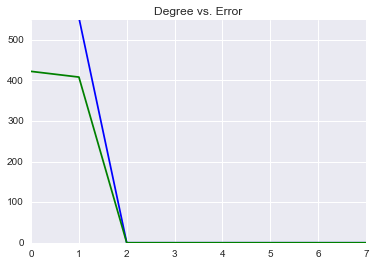

In [11]:
train_error = []
test_error = []
rsqr = []

for degree in range(8):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train, y_train)
    train_error.append(mean_squared_error(y_train, est.predict(X_train)))
    test_error.append(mean_squared_error(y_test, est.predict(X_test)))
    rsqr.append(est.score(X_test, y_test))
    
plt.plot(np.arange(8), train_error, color='blue')
plt.plot(np.arange(8), test_error, color='green')
plt.ylim((0.0, 550.0))
plt.title('Degree vs. Error');

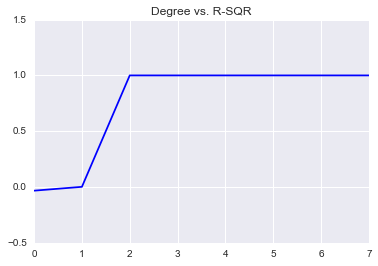

In [12]:
plt.plot(np.arange(8), rsqr, color='blue')
plt.ylim((-0.5, 1.5))
plt.title('Degree vs. R-SQR');

### Exercise 4.4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 60 to 44
Data columns (total 1 columns):
0    70 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


In [18]:
train_error = []
test_error = []
for n in range(5,75,5):
    lr = LinearRegression()

    lr.fit(X_train[0:n], y[0:n])

    y_pred_training = lr.predict(X_train[0:n])
    train_error.append(mean_squared_error(y_train[0:n], y_pred_training))


    y_pred_test = lr.predict(X_test)
    test_error.append(mean_squared_error(y_test, y_pred_test))

    
print train_error
print test_error

[818.64313387435709, 747.38473311509779, 515.26496868842253, 749.46514654452483, 665.80445154125368, 604.42488867376767, 542.29472421225705, 633.89194077161937, 620.49290102503187, 582.35903588017754, 588.13765637661743, 590.55443955029796, 653.58499592816042, 641.1889176515881]
[475.24483822817325, 457.76950327556125, 454.14904711453107, 461.44015734030097, 437.54242826458847, 484.12724300550093, 460.82948815751382, 487.32694045038363, 501.35887146810586, 478.14411788768382, 474.77926494030908, 473.67053147226176, 465.88169498287454, 451.28136771212564]
